In [2]:
import h5py
import numpy as np
import pandas as pd
#导入数据../data/testPredict.npy
#导入数据../data/testY.npy
testPredict = np.load('./data/testPredict.npy')
testY = np.load('./data/testY.npy')
print(testPredict.shape)
print(testY.shape)
#反归一化
data_min = 0.0
data_max = 4435
testPredict = testPredict * (data_max - data_min) + data_min
testY= testY * (data_max - data_min) + data_min
print(testPredict.shape)
print(testY.shape)



(423, 100, 100, 1)
(423, 100, 100, 1)
(423, 100, 100, 1)
(423, 100, 100, 1)


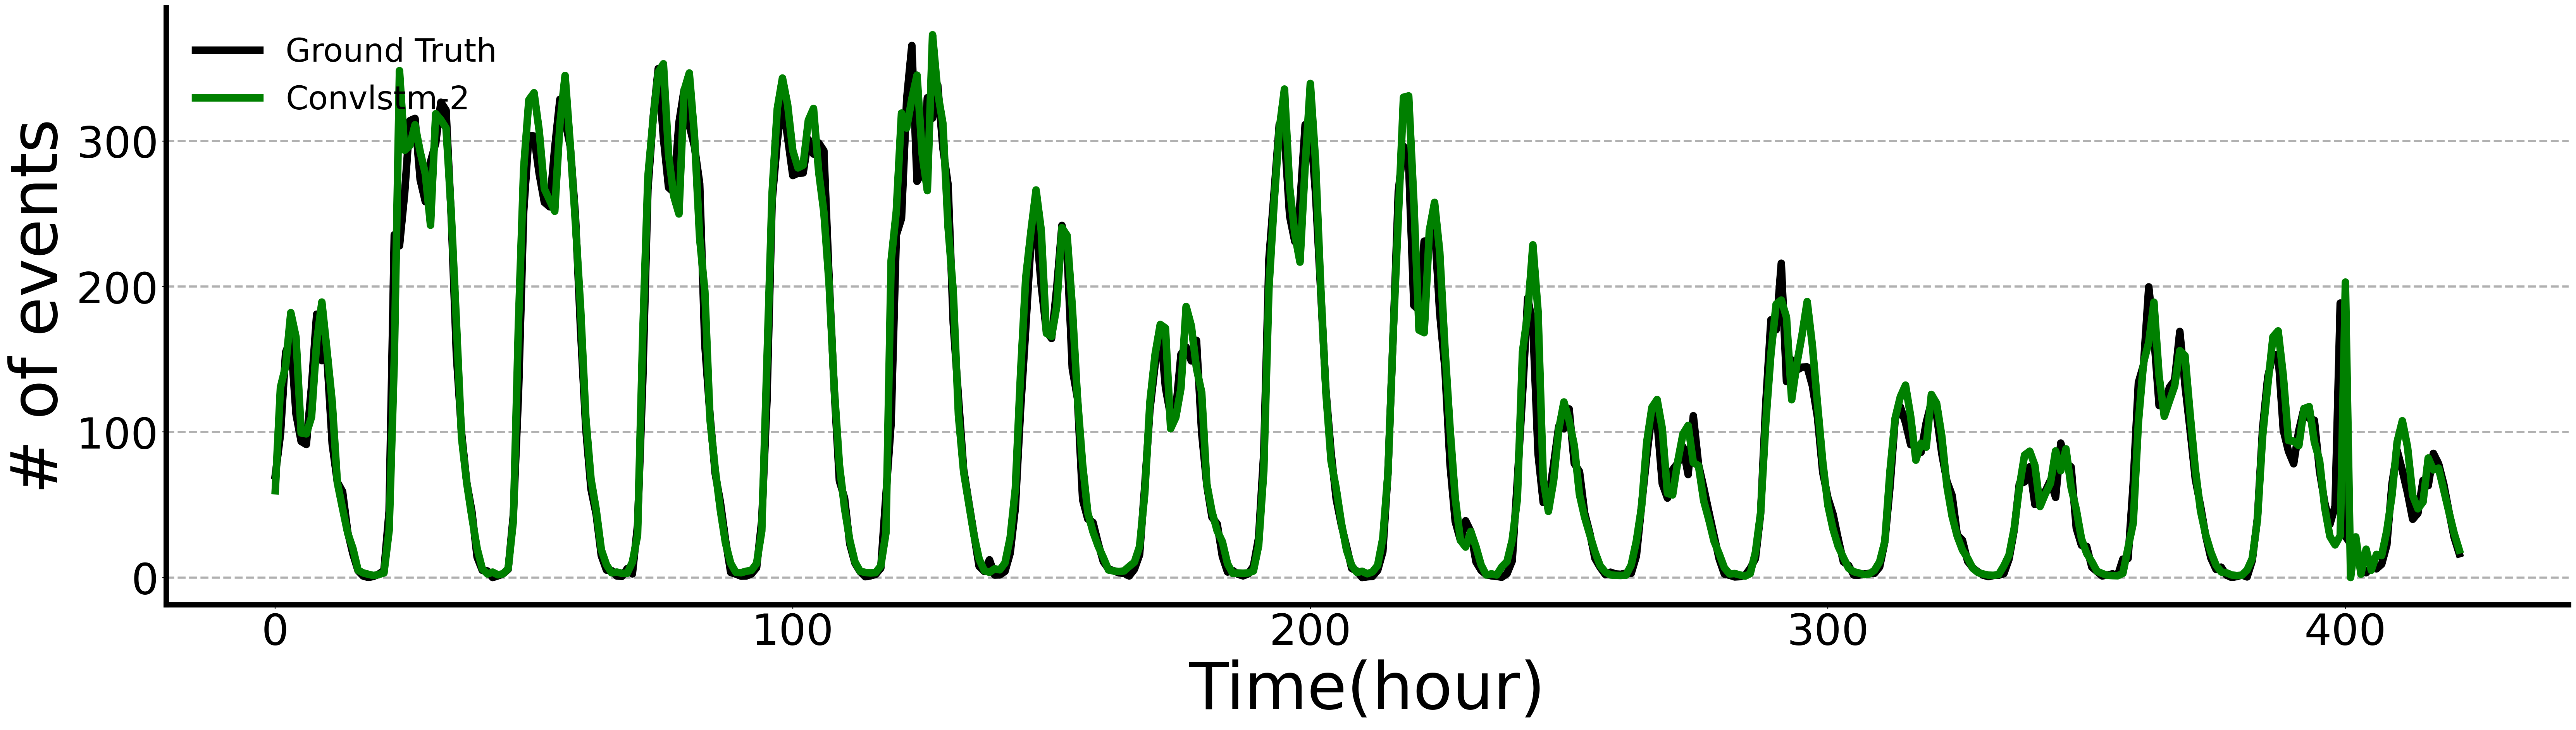

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time(hour)', fontsize=60,labelpad=5)
ax.set_ylabel('# of events', fontsize=60,labelpad=5)
ax.plot(testY[:,50,50,0],'black',label='Ground Truth',linewidth=7)
ax.plot(testPredict[:,50,50,0],'g',label='Convlstm-2',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

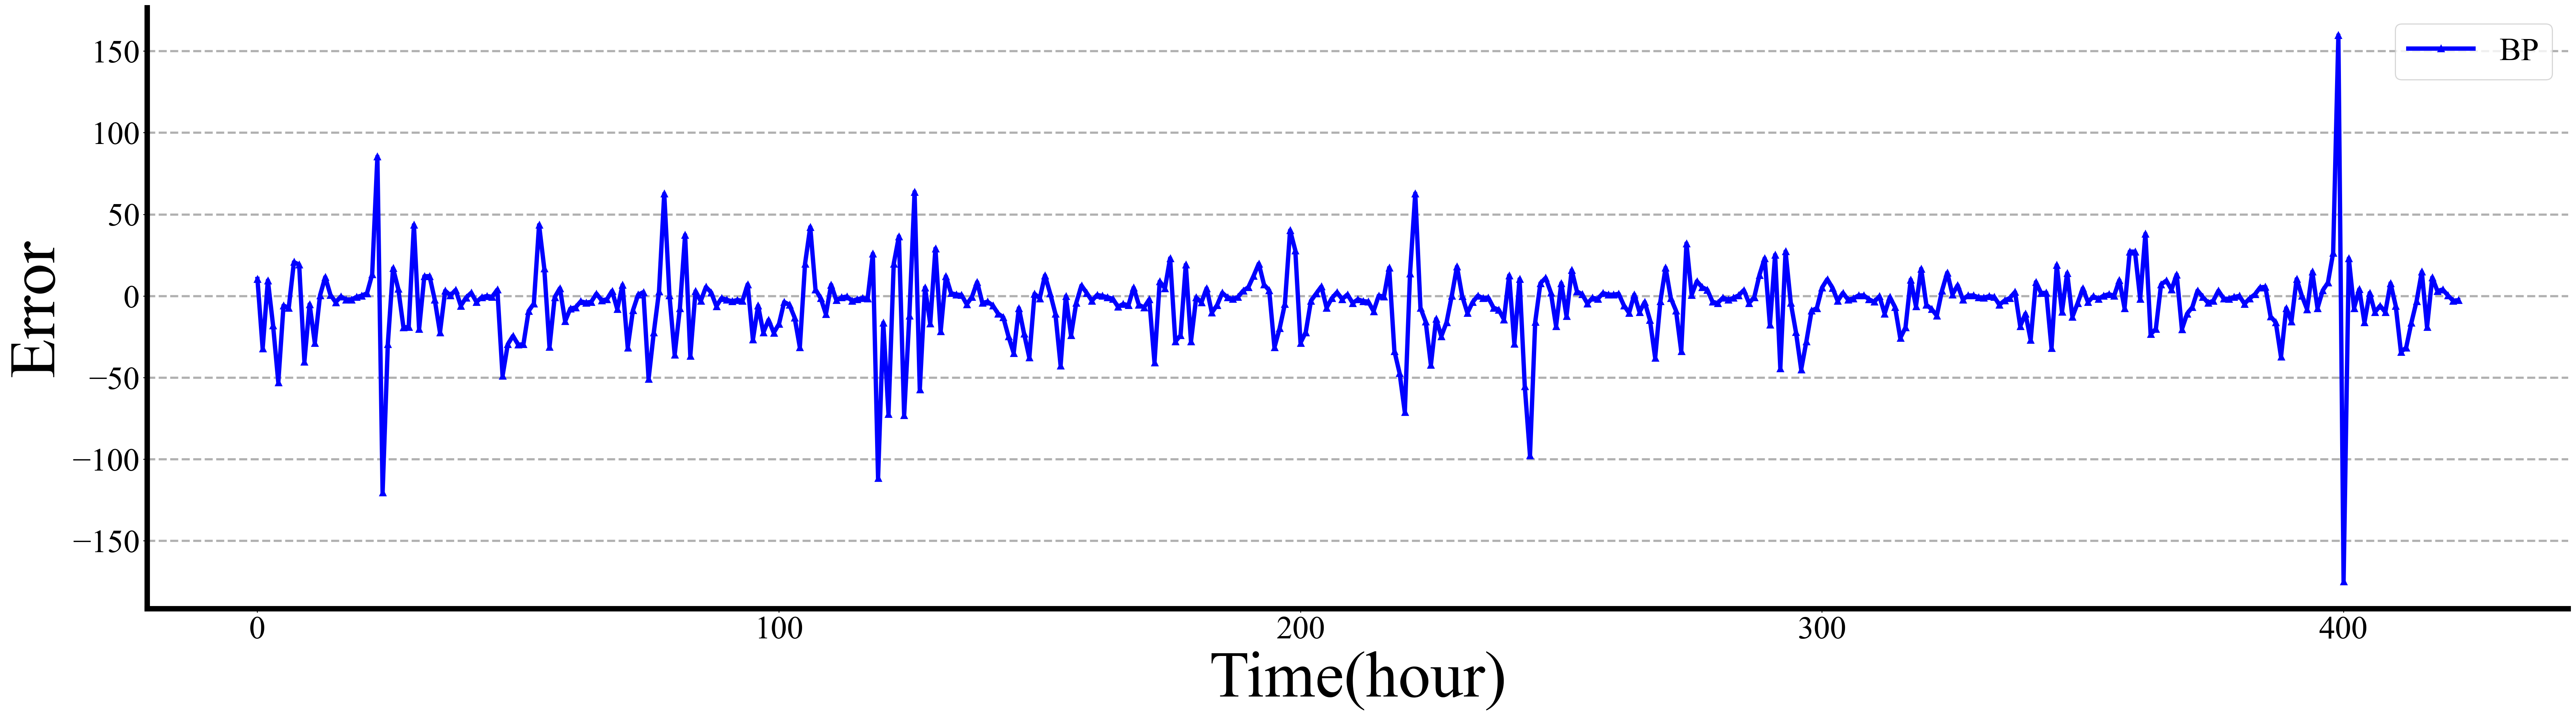

In [10]:
#绘制误差图
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time(hour)', fontsize=60,labelpad=5)
ax.set_ylabel('Error', fontsize=60,labelpad=5)
ax.tick_params(labelsize=30)
ax.plot(testY[:,50,50,0]-testPredict[:,50,50,0],'b^-',label='BP',linewidth=4)
ax.legend(loc='upper right',fontsize=30)
ax.grid(axis='y',linestyle='--',linewidth=2)

plt.show()


In [11]:
testY=testY.reshape(4230000,1)
testPredict=testPredict.reshape(4230000,1)

In [12]:
from  sklearn import  metrics
import numpy as np

def GetRMSE(y_hat,y_test):
    sum = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
    return  sum

def GetMAE(y_hat,y_test):
    sum = metrics.mean_absolute_error(y_test, y_hat)
    return  sum

def GetMAPE_Order(y_hat,y_test):
    #删除test_y 为0元素
    zero_index = np.where(y_test == 0)
    y_hat = np.delete(y_hat,zero_index[0])
    y_test = np.delete(y_test,zero_index[0])
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum
#计算R2
def GetR2(y_hat,y_test):
    sum = metrics.r2_score(y_test, y_hat)
    return sum



print("RMSE为",GetRMSE(testPredict,testY))
print("MAE为",GetMAE(testPredict,testY))
print("MAPE为",GetMAPE_Order(testPredict,testY))
print("R2为",GetR2(testPredict,testY))

RMSE为 14.405428029309185
MAE为 4.834928874113926
MAPE为 106.86366470870175
R2为 0.9699630577344948
